In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import Image

### catch up forked branch with upstream
Fetch project branches from the upstream repository to get all the commits. Your commits to master will be stored in the remote branch upstream/master.

\\$ git fetch upstream
<br>
\\$ git checkout master
<br>
\\$ git merge upstream/master
<br>
\\$ git push

## IPython and Jupyter notebook

Python: a general-purpose PL. (1980s)

IPython is an interactive command-line terminal for Python (2001). 
    - A powerful interface to the Python language. 
    - Besides Ipython, the most common way to use Python is to write .py scripts.

In 2011, IPython introduced a new tool called Notebook, which offers a web interface to Python. 

    - more convenient text editor
    - improved graphical capabilities. 
    - it's a web interface, so can integrate web libraries, e.g. plotly.js

## IPython and shell commands

In [60]:
ls

In [2]:
pwd

'/Users/hangjianli/2019-fa-stats131'

#### Any command-line commands can be used in IPython by prefixing it with !

In [ ]:
! echo 'print from the shell'

## You can pass values to and from the Shell

In [8]:
contents = !ls
contents[0]

'01-02_in_class.ipynb'

In [5]:
directory = !pwd
directory

['/Users/hangjianli/2019-fa-stats131']

## IPython magic functions

### Difference between ! and %

! calls out to a temporary subshell (in a new process), while % affects the process associated with the notebook. e.g., 

!cd foo, by itself, has no lasting effect, since the process with the changed directory immediayely terminates.  

%cd foo changes the current directory of the notebook process, which is a lasting effect.


In [10]:
!pwd
!cd ..
!pwd

/Users/hangjianli/2019-fa-stats131
/Users/hangjianli/2019-fa-stats131


In [11]:
!pwd
%cd ..
!pwd
%cd 2019-fa-stats131/

/Users/hangjianli/2019-fa-stats131
/Users/hangjianli
/Users/hangjianli
/Users/hangjianli/2019-fa-stats131


In [16]:
a = 1
b = 2
a
b

1

2

1

2

3

## Debugging

### control exception

In [20]:
def func1(var1, var2):
    return var1 / var2

def func2(x):
    var1 = x
    var2 = x - 1
    return func1(var1, var2)

In [22]:
%xmode Verbose

Exception reporting mode: Verbose


In [23]:
func2(1)

ZeroDivisionError: division by zero

In [24]:
%xmode Context

Exception reporting mode: Context


In [25]:
func2(1)

ZeroDivisionError: division by zero

In [26]:
%xmode Plain

Exception reporting mode: Plain


In [27]:
func2(1)

ZeroDivisionError: division by zero

### Debugger

s(tep): Execute the current line, stop at the first possible occasion (either in a function that is called or on the next line in the current function).<br>
r(eturn): Continue execution until the current function returns. <br>
c(ontinue): Continue execution, only stop when a breakpoint is encountered. <br>
q(uit): quit from debugger

In [32]:
%pdb off

Automatic pdb calling has been turned OFF


In [33]:
func2(1)

> <ipython-input-30-5f653b836ae0>(5)func2()
-> return func1(val1, val2)
(Pdb) q


BdbQuit: 

In [36]:
def func2(x):
    val1 = x
    import pdb; pdb.set_trace()
    val2 = x - 1
    import pdb; pdb.set_trace()
    return func1(val1, val2)

In [37]:
func2(1)

> <ipython-input-36-d74b1cd827e3>(4)func2()
-> val2 = x - 1
(Pdb) val1
1
(Pdb) val2
*** NameError: name 'val2' is not defined
(Pdb) c
> <ipython-input-36-d74b1cd827e3>(6)func2()
-> return func1(val1, val2)
(Pdb) val2
0
(Pdb) continue


ZeroDivisionError: division by zero

## Timing 

In [38]:
%time
sum(range(100))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


4950

In [39]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [40]:
sum_of_lists(100)

20920

In [41]:
%prun sum_of_lists(1000000)

In [42]:
%prun?

## Python data types -- Everything in Python is an object

### dynamic typing

In [43]:
a = 1

In [45]:
a = 'b'

In [44]:
type(a)

int

In [46]:
type(a)

str

/* C code */

struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};

* ob_refcnt, a reference count that helps Python silently handle memory allocation and deallocation
* ob_type, which encodes the type of the variable
* ob_size, which specifies the size of the following data members
* ob_digit, which contains the actual integer value that we expect the Python variable to represent.

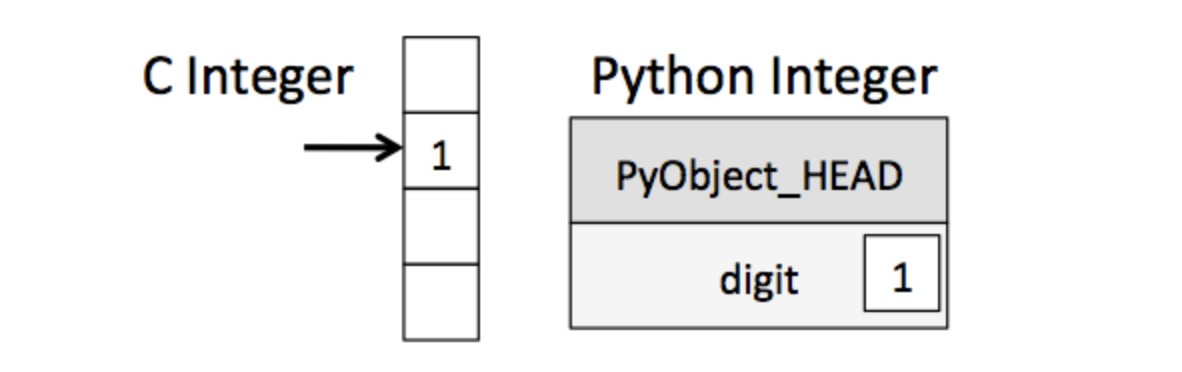

In [47]:
Image("python_int.png")

In [48]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

### Numpy array is more memory-efficient

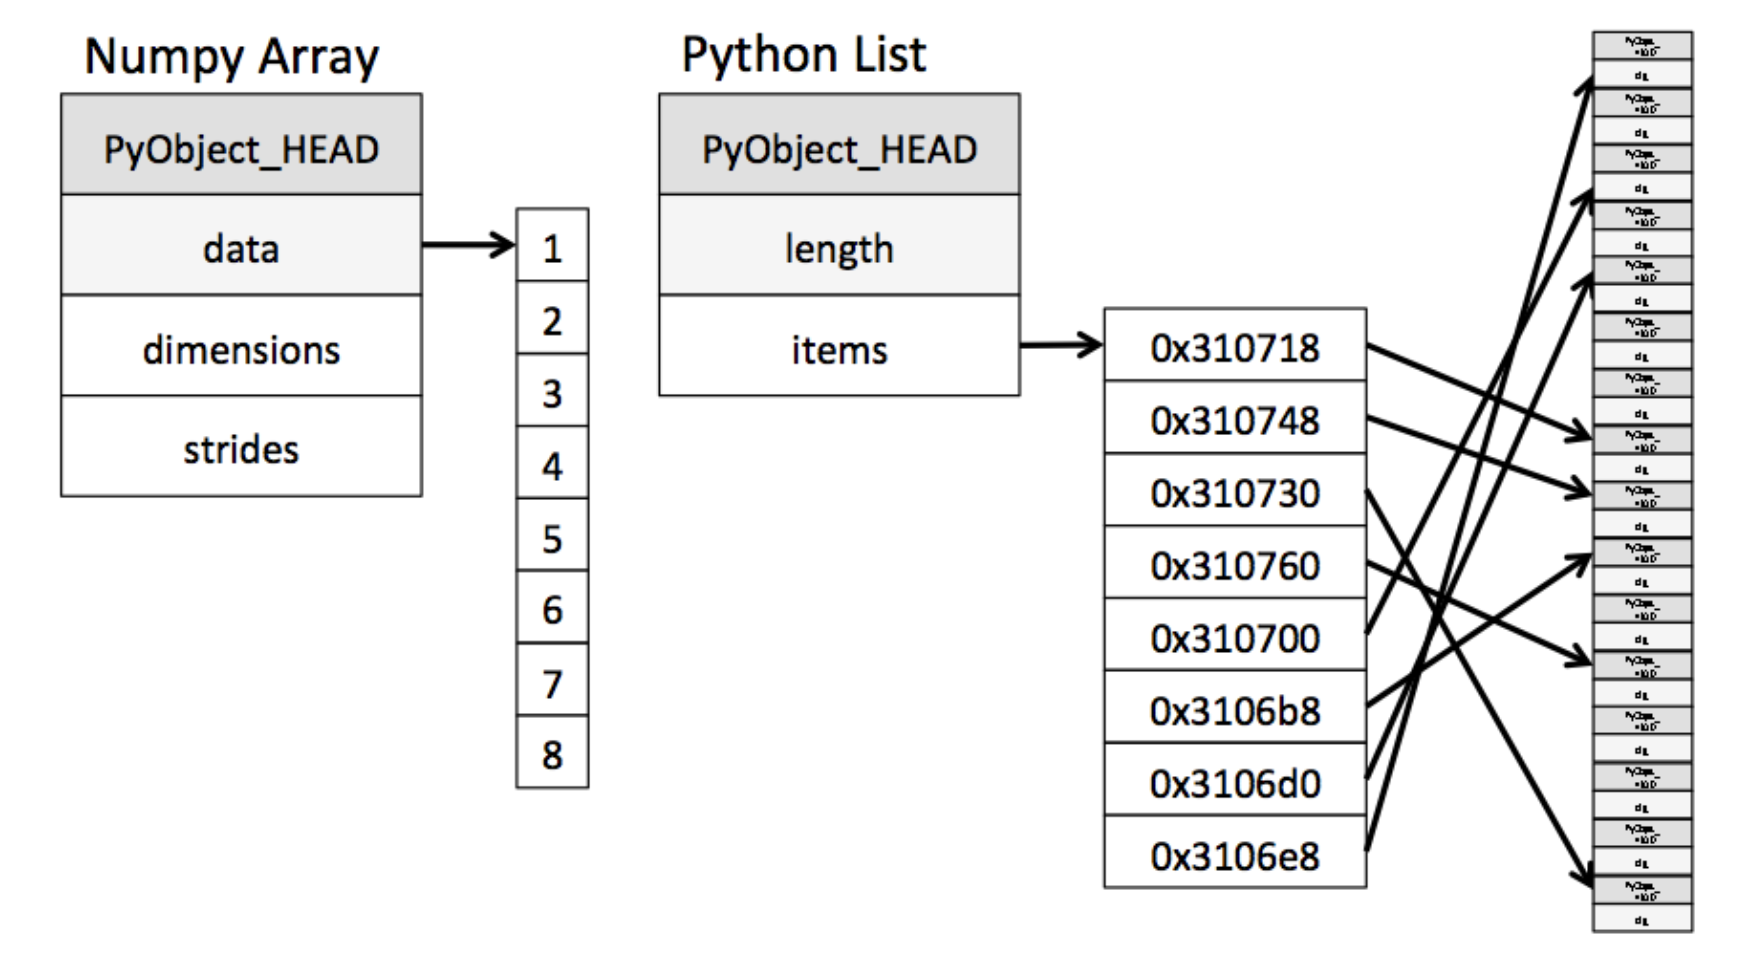

In [49]:
Image('list_type.png')

### Creating Arrays from Python Lists

In [50]:
import numpy as np

In [51]:
arr = np.array([1, 4, 2, 5, 3])
arr
arr.dtype

array([1, 4, 2, 5, 3])

dtype('int64')

In [52]:
arr2 = np.array([3.14, 1, 2, 3])
arr2
arr2.dtype

array([3.14, 1.  , 2.  , 3.  ])

dtype('float64')

## Mutable vs Immutable Objects

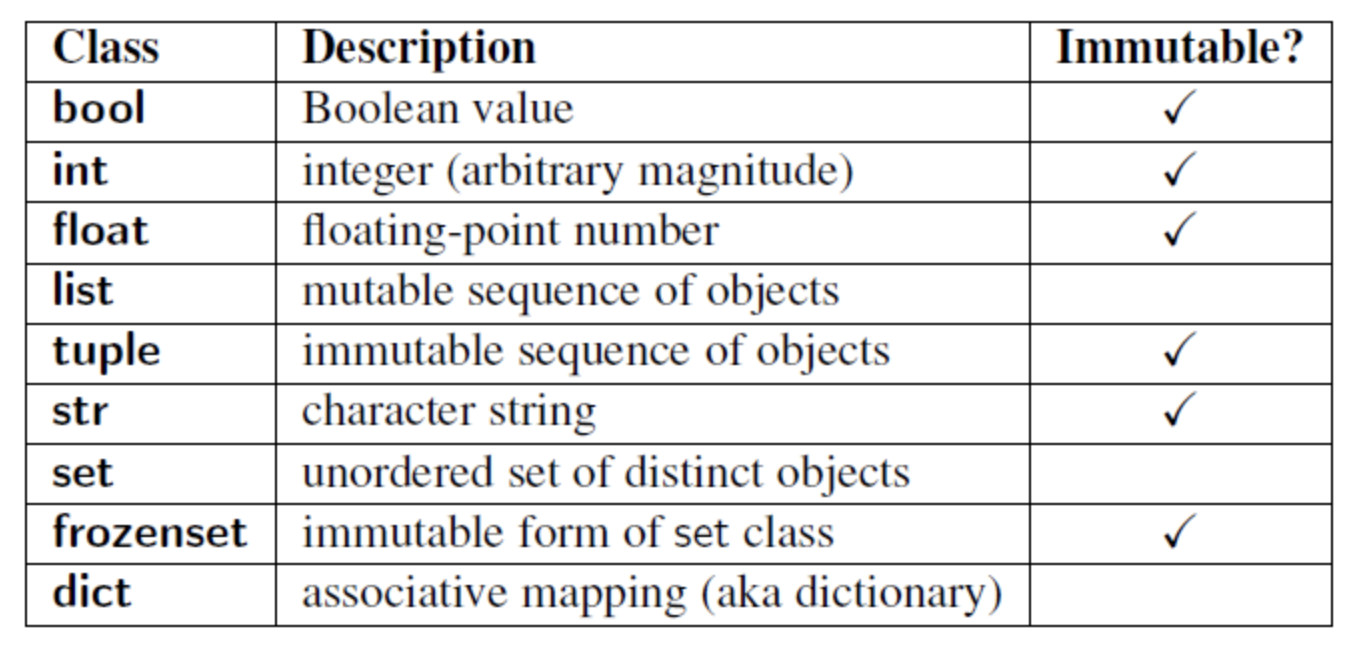

In [53]:
Image('mutability.png')

In [54]:
x = [1,2,3,4,5]
y = x
x[0] = 100
x
y

[100, 2, 3, 4, 5]

[100, 2, 3, 4, 5]

In [55]:
values = [4, 5, 6]
values2 = values
print(id(values))
print(id(values2))

values.append(7)
print(values is values2)
print(values)
print(values2)
print(id(values))
print(id(values2))

4355020488
4355020488
True
[4, 5, 6, 7]
[4, 5, 6, 7]
4355020488
4355020488


In [56]:
text = "Python"
text2 = text
print(id(text))
print(id(text2))
print(text is text2)
print()

text += " is awesome"
print(id(text))
print(id(text2))
print(text is text2)
print()

print(text)
print(text2)

4308131096
4308131096
True

4366269008
4308131096
False

Python is awesome
Python
